## Lighthouse Labs
### W09D2 Time Series II

Instructor: Samuel Boylan

Jan 4, 2021

Notebook modified from Andrew & Socorro. 

**What will we learn today?**

* Facebook Prophet

* Time Series as a Supervised Learning problem

* Deep Learning for Stock Prediction

* Time Series Final Project Brainstorm - exercise

## Facebook Prophet

* FB Prophet is a procedure for forecasting time series data using a powerful toolkit created by Facebook. It allows us to decompose and model trends from time series data.

* It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


### Why use Facebook Prophet?

* It is accurate and fast
    * It is used in many applications across Facebook and it produces reliable forecasts for planning and goal setting.
    * Forescasts in a few seconds.
* Fully automatic
    * No manual effort. Robust to outliers, missing data, changes in time series.
* Tunable forecasts
    * Users can tweak and adjust forecasts. Add your domain knowledge!
* R or Python

*   Allows us to solve various Business Analytics Questions




### Predicting and Decomposing Online Sales for a Company using FB Prophet!

In [2]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import requests, json, os, warnings, re

# ignore warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

In [6]:
# Model Initialize

# !pip install prophet # if you havn't done so
import fbprophet
from fbprophet import Prophet

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv")

In [8]:
# Preprocess the data
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [14]:
from datetime import datetime as dt

In [32]:
df["Year"] = df["Time Date"].apply(lambda x: str(x)[-4:])
df['Month'] = df["Time Date"].apply(lambda x: str(x)[-6:-4])
df['Day'] = df["Time Date"].apply(lambda x: str(x)[:-6])

df['datetime'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [33]:
df.columns = ['y', 'ds'] # for prophet

In [35]:
df = df[['ds','y']]

In [36]:
#Instatiate model
m = Prophet(interval_width=0.95, daily_seasonality=True)

In [37]:
model = m.fit(df)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1946.15     0.0011125       107.664           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       1946.39    0.00142368       166.991   1.425e-05       0.001      285  LS failed, Hessian reset 
     199       1946.42   5.79081e-05       36.1065      0.3903      0.3903      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1946.43   8.04272e-05       78.8924   1.208e-06       0.001      364  LS failed, Hessian reset 
     264       1946.44   6.00866e-06       62.1111   7.385e-08       0.001      445  LS failed, Hessian reset 
     299       1946.44   2.06358e-05       79.4759           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [38]:
#Forecast into the future
# make future data frame - for a year
future = m.make_future_dataframe(periods=365) # creates dates
forecast = m.predict(future)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [40]:
forecast.head()[['ds','yhat_lower', 'yhat_upper','yhat']] # values we want is yhat_lower, yhat_upper (of confidence interval), yhat, ds)

,ds,yhat_lower,yhat_upper,yhat
0,2018-01-01,792.183428,4002.706214,2400.181562
1,2018-01-02,830.951269,3978.496500,2390.854209
2,2018-01-03,840.471668,3983.055668,2417.484606
3,2018-01-04,943.105797,4121.287760,2465.228326
4,2018-01-05,865.787280,4087.841615,2430.011102


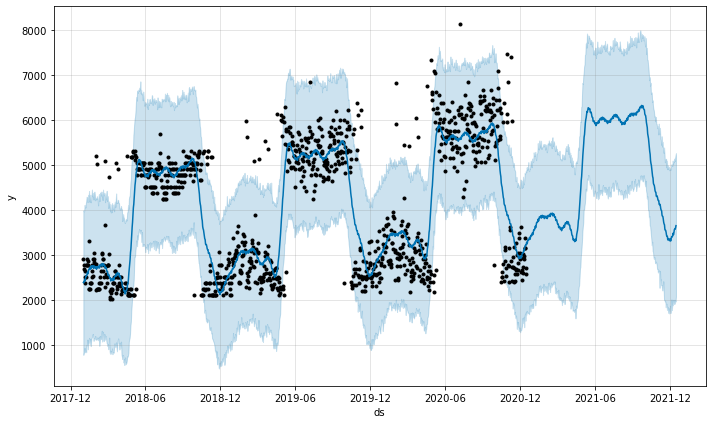

In [41]:
plot1 = m.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


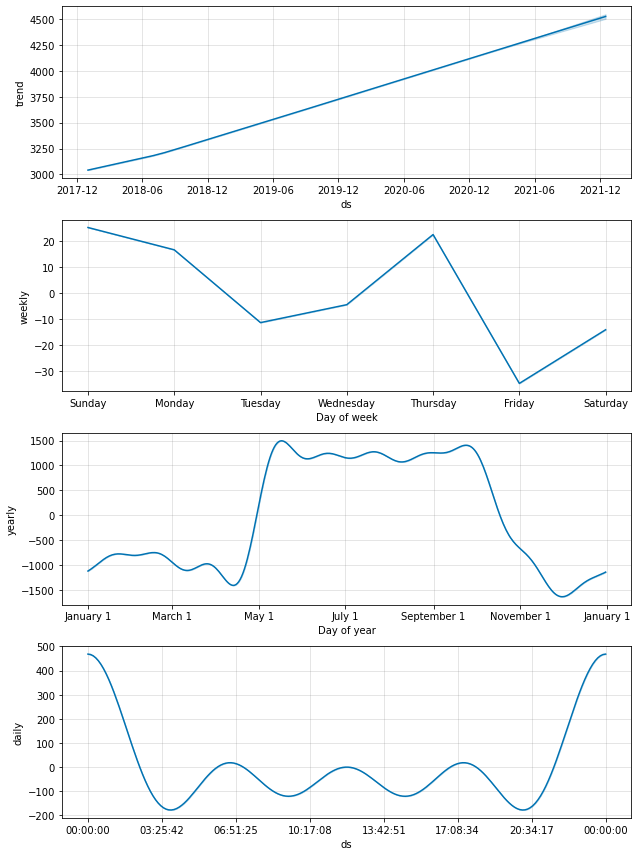

In [42]:
#Plot
plot2 = m.plot_components(forecast)

In [ ]:
# trendline is actual values
# the rest negative is deviation from the mean - variance

- The black datapoints are the real observation
- The line is the predicted y-hat

## Time Series Forecasting as Supervised Learning

Review:
* What is Supervised Learning? 
    
* How is data given in SL?

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.

$Y = f(X)$

We can Shift our time series data to create a Y label

Lets see this in an example for predicting the Future Price of Any Stock with an LSTM! 

In [43]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# mostly used in finance - the best algorithms usually used here for prediction - can be applied to stores etc. 
# essentially shifting one column of data - to predict n number of days in the future
# using LSTM
# technical analysis python - add_all_ta_features - function that creates 89 different columns with technical indicators - e.g. momentum, moving average
# for stock prices
# can be done with fbprophet with date and close 

In [ ]:
#Download data from here! https://ca.finance.yahoo.com/

In [44]:
df = pd.read_csv("BTC-USD.csv")

In [45]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
1,2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044
2,2021-06-30,35908.386719,36074.757813,34086.152344,35040.835938,35040.835938,34059036099
3,2021-07-01,35035.984375,35035.984375,32883.781250,33572.117188,33572.117188,37838957079
4,2021-07-02,33549.601563,33939.589844,32770.679688,33897.046875,33897.046875,38728974942
...,...,...,...,...,...,...,...
361,2022-06-24,21084.648438,21472.917969,20777.511719,21231.656250,21231.656250,24957784918
362,2022-06-25,21233.609375,21520.914063,20964.585938,21502.337891,21502.337891,18372538715
363,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
364,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707


In [46]:
df.shape

(366, 7)

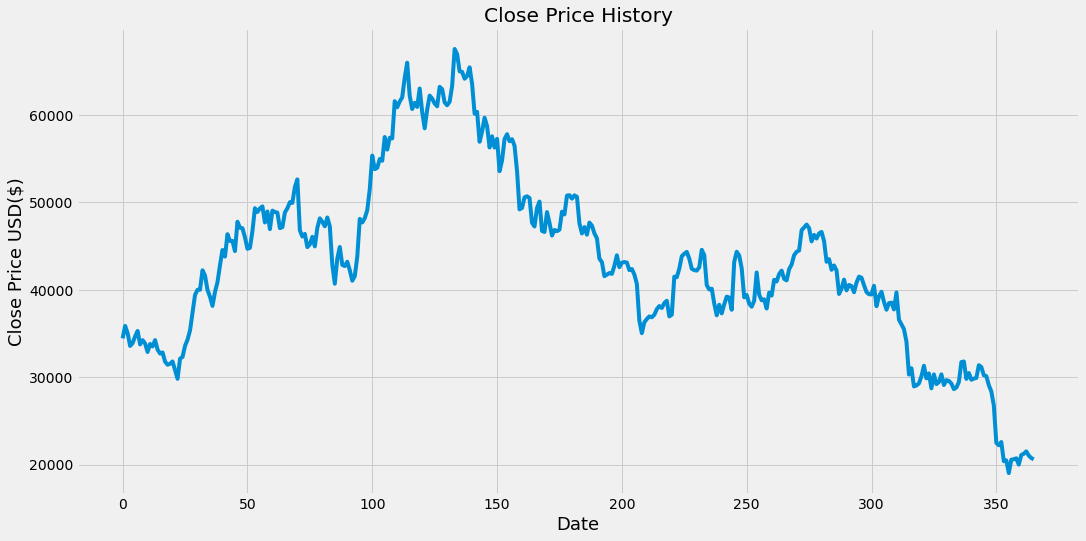

In [47]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [48]:
data=df.filter(['Close']) #extract close 
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8) #create training data of 80% 

#scale the data
scaler=MinMaxScaler(feature_range=(0,1)) # can have big impact on model in stocks, try different scalers, can be treated as hyperparameter
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.31754793],
       [0.34707348],
       [0.33004042],
       [0.29978823],
       [0.30648103],
       [0.32237213],
       [0.33512691],
       [0.3033699 ],
       [0.3134461 ],
       [0.30562172],
       [0.28547808],
       [0.30444113],
       [0.29872544],
       [0.31354892],
       [0.29121405],
       [0.28186637],
       [0.28434473],
       [0.26288985],
       [0.25549134],
       [0.25778858],
       [0.26322106],
       [0.24305638],
       [0.22224276],
       [0.26968631],
       [0.27385553],
       [0.29998254],
       [0.31462531],
       [0.33641234],
       [0.37734706],
       [0.41997201],
       [0.43210331],
       [0.4323611 ],
       [0.47823468],
       [0.46568346],
       [0.43167052],
       [0.41574956],
       [0.39414333],
       [0.4269868 ],
       [0.45009843],
       [0.49020096],
       [0.5260265 ],
       [0.51041999],
       [0.56330007],
       [0.54722625],
       [0.5474035 ],
       [0.52340006],
       [0.59271185],
       [0.578

In [49]:
#Create training data set
#This is where we shift the data **** # since we only have one value 
# can also be done by y = df.shift(30) - used for prediction ** how time series is turned to a machine learning problem

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

for i in range(60,len(train_data)): # takes last 60 days and predicts the next - can be modified
  x_train.append(train_data[i-60:i,0]) #makes a list of a list 
  y_train.append(train_data[i,0])

In [50]:
len(x_train)

233

In [51]:
len(y_train)

233

In [52]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(233, 60)

In [53]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(233, 60, 1)

In [54]:
# build LSTM model
# can be done with any time series data # if error mostly in input or output
# LSTM captures patterns in time 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
# could add drop out and more LSTM to fit 
model.add(Dense(25))
model.add(Dense(1))


In [55]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [56]:
#train the model # batch size essentially daily - more data - bigger batch size
model.fit(x_train,y_train,batch_size=1,epochs=1)

2022-06-28 14:27:31.566515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


233/233 [==============================] - 3s 10ms/step - loss: 0.0176


In [57]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  

In [58]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) # revert back to original non-scaled 


/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_71154/1893841253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


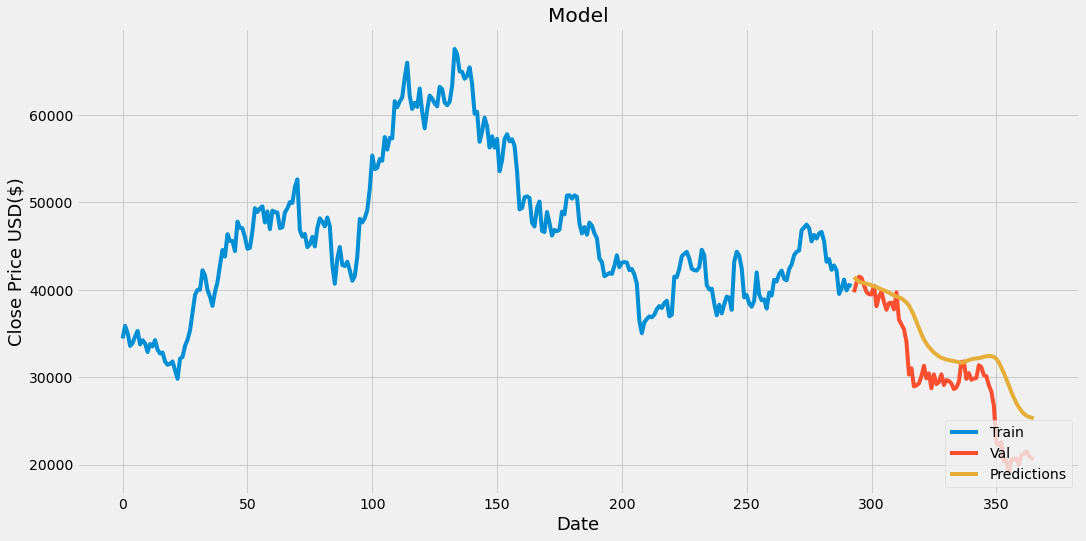

In [59]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# to improve: logarithmic scaler, batch size, adding lstm layers
# alpaca - putting money into trading bot - paper trading api... - can put buying/sell keys

**Time Series Final Project Brainstorm - exercise**



*   Climate Change Forecast

*   Food Demand Forecasting
*   List item


*   Using XGBoost and its variants to predict Stock Prices and hook it up to https://alpaca.markets/


*   Data Science Tournament, you can get paid to build financial models! https://numer.ai/





*   Want to go more in depth into Making money with the power of data science?  I highly recommend this textbook! https://www.amazon.ca/Advances-Financial-Machine-Learning-Marcos/dp/1119482089/ref=asc_df_1119482089/?tag=googleshopc0c-20&linkCode=df0&hvadid=292982483438&hvpos=&hvnetw=g&hvrand=3604397138690398481&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9001010&hvtargid=pla-422557754574&psc=1




